# Preliminary Code for Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Plots of ML types

C:\Users\qsz629\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qsz629\AppData\Local\Temp\ipykernel_17676\620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Series(a)) for i,a in enumerate(coef_tab[:6])]),1)\
C:\Users\qsz629\AppData\Local\Temp\ipykernel_17676\620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Ser

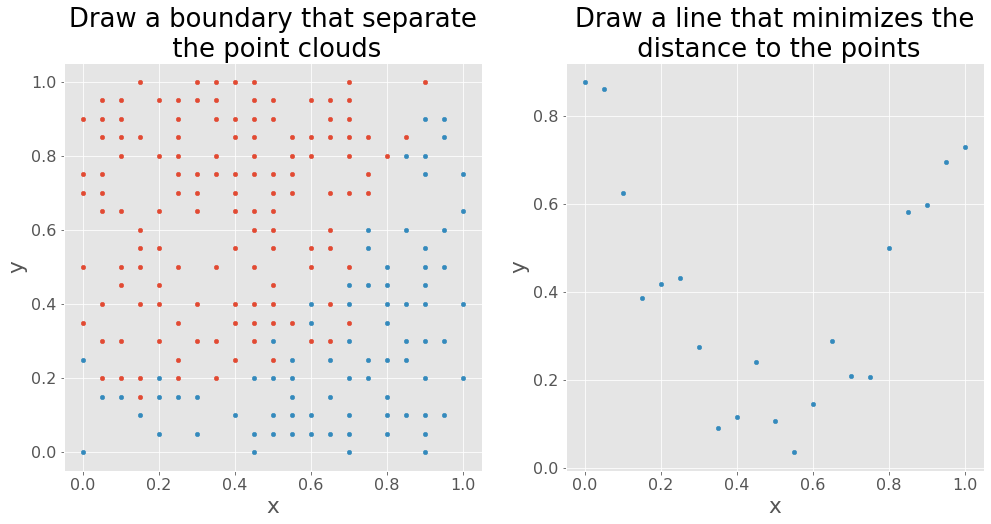

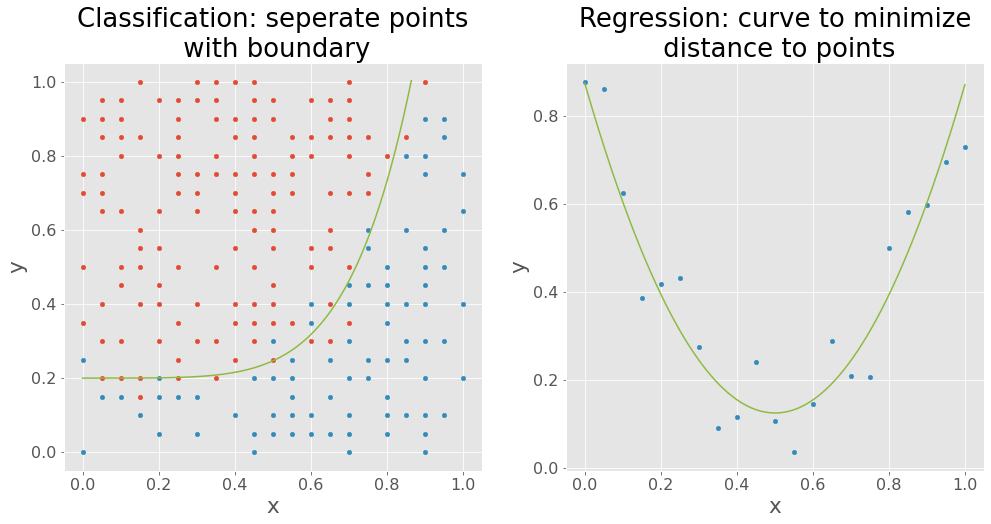

NameError: name 'f_complexity' is not defined

NameError: name 'f_complexity' is not defined

In [2]:
%run ML_plots.ipynb

<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Session 12: Model Selection and Cross-Validation

*Tobias Gabel Christiansen*

## Recap from Yesterday (I/III)

Supervised learning: Having a (labelled) target variable
- Classification problems: 
    - Perceptron
    - Adaline, Logistic regression    
- Regression-type problems: 
    - Linear regression 
    - Lasso, Ridge, Elastic Net

Overfitting vs underfitting:

- Underfitting:
    - Lack of flexibility does not allow modelling true DGP
    - Model predictions are inevatibly *biased* (more on this today)
    - Poor performance on both training and test data

- Overfitting:
    - Too much flexibility causes model to fit to spurious relations in data
    - Good performance on training data but poor performance on test data (e.g. large fluctuations / varaince in performance across different data sets)

## Recap from Yesterday (II/III)

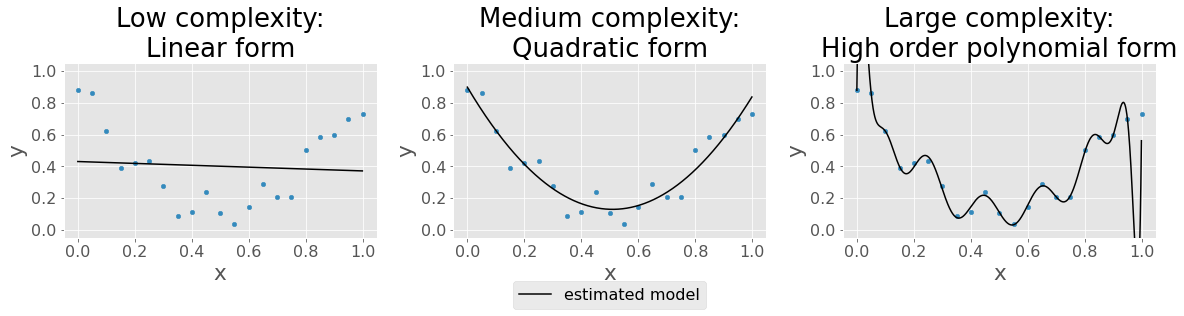

In [230]:
f_complexity[2]

## Recap from Yesterday (III/III)

Overcoming overfitting...

- Regularization:
    - Regression models: We add a penalty term our optimization procedure: $$ \text{arg min}_\beta \, \underset{\text{MSE=SSE/n}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$
        - Too many irrelevant features - solved by L1 regularization ~ lasso
        - Exploding coefficients - solved by L2 regularization ~ ridge
    - Other models: Many more ways of 'punishing' model flexibility!

- Check whether model generalizes: 
    - Make train/test split and evaluate performance on test data

Anlytical vs. approximate solutions:
- Optimization with gradient descent
- Batch vs mini-batch vs stochastic

Remember to standardize features using the training data!

# Question: What is Wrong with my Code :( ? (I/II)

A coommon mistake when computing net inputs, predictions and errors:

In [28]:
def fun1(x):
    z = x*2
    return z

def fun2(x):
    y = z+7
    return y

fun2(3)

NameError: name 'z' is not defined

# Question: What is Wrong with my Code :( ? (II/II)

The problem: Objects that you create _within_ a function generally don't live _outside_ this function, unless you output it with _return_:

In [234]:
def fun1(x):
    z = x*2
    return z

def fun2(x):
    y = fun1(x)+7
    return y

fun2(3)

13

# Question: How do I Update the Weight Associated with Bias Term? (I/II)

Suppose you are using _gradient descent_ to update weights. Then we know that:

\begin{align}\frac{\partial SSE}{\partial\hat{\textbf{w}}} & =-\textbf{X}^{T}\textbf{e}\qquad\text{(the gradient)}\\
\Delta\hat{\textbf{w}} & =-\eta\cdot\frac{\partial SSE}{\partial\hat{\textbf{w}}}\qquad\text{(gradient descent)}\\
 & =\eta\cdot\textbf{X}^{T}\textbf{e}\\
 & =\eta\cdot\textbf{X}^{T}(\textbf{y}-\textbf{X}\hat{\textbf{w}})
\end{align}

*But what about the bias term, $w_0$?*

You easily get a dimensionality problem. $\textbf{X}$ has $d$ columns but $w$ has a length of $d+1$!

*So....?*

A trick is to add a column of one's to $\textbf{X}$!

# Question: How do I Update the Weight Associated with Bias Term? (II/II)

Suppose that $\textbf{X}$ initially lookes like the following:

In [1]:
import numpy as np
X = np.random.normal(0,1, size=(4,3))
X

array([[ 1.18218221,  1.3099073 , -0.70660526],
       [ 0.13958128, -0.76774844,  1.05988906],
       [-0.93253383,  1.18227946, -1.4025722 ],
       [-0.84527188, -0.74537724,  0.141958  ]])

In [13]:
X_new = np.c_[np.ones(len(X)),X]
X_new

array([[ 1.        ,  1.18218221,  1.3099073 , -0.70660526],
       [ 1.        ,  0.13958128, -0.76774844,  1.05988906],
       [ 1.        , -0.93253383,  1.18227946, -1.4025722 ],
       [ 1.        , -0.84527188, -0.74537724,  0.141958  ]])

You can now think of your data as containing a variable (associated with the bias term) that is just always equal to one!

$$y = w_0\cdot 1 + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + \varepsilon$$

# Overview of Session 12

Today, we will introduce stastical modelling and the fundamental ideas behind machine learning. In particular, we will cover:
1. The bias/variance trade-off
2. Model building (pipelines)
3. Model validation
    - Basic validation
    - Cross validation
    - Tools for model selection

# Associated Readings

PML, chapter 6:
- Using pipelines to simplify and quality assure workflow
    - Using a pipeline to combine transformers *and* estimators

- Cross-validation
    - The holdout method
    - K-fold cross-validation for assessment of model performance
    - Debugging algorithms with learning and validation curves

- Applying learning curves to discover learn bias/variance issues
    - Addressing over- and underfitting with validation curves

- Tuning hyperparameters via grid search
    - Algorithm selection with nested cross-validation
    - Looking at different performance evaluation metrics

# Model Bias and Variance

## Bias and Variance (I/V)
*How do we describe the modelling error? What terminology can we use?*

From [Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff), two types of 'errors':

- model **bias**: _an error from erroneous assumptions in the learning algorithm_
  - high bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**)
- model **variance**: _an error from sensitivity to small fluctuations in the training set_
  -  high variance can cause an algorithm to model random noise in the training data, rather than the intended outputs (**overfitting**).
 
 

## Bias and Variance (II/V)
*In these terms, what is overfitting then?*

Overfitting is: low bias / high variance

- Training our model, we capture all 'true' patterns but we also find some 'irrelevant' patterns
- Reacts too much to training sample errors:
    - Some errors are really just noise, and thus we find too many spurious relations 
- Examples of causes: 
    - Too many polynomial expansion of variables (`PolynomialFeatures`)
    - More advanced models (very flexible!) without properly tuned hyperparameters: 
        - Decision Trees, Support Vector Machines or Neural Networks

## Bias and Variance (III/V)
*And what is underfitting then in these terms?*

Underfitting is high bias / low variance:
- Oversimplification of models --- cannot approximate all patterns
- Examples of causes:
    - linear and logistic regression (without polynomial expansion)

## Bias and Variance (IV/V)

The bias/variance terminology comes from the fact that we can decompose the out-of-sample error into a bias term and a variance term.

- Let $f$ be the target function that generates data, and let $g^D$ be the model (e.g. a linear regression model) we fitted on our particular data set $D$ (e.g. our particular draw of observations). The out-of-sample error is then:

$$Error(g^D)=E_{x}[(g^D(x)-f(x))^2] $$

- We can get rid of the dependence on our particular data set by taking the expectation wrt. to all possible draws $D$, and then after some tidious rewriting (See p. 62-64 [here](https://amlbook.com/index.html) for a full derivation):

$$E_D[Error(g^D)]=E_x[(\bar{g}(x)-f(x))^2] + E_x[E_D(g^D(x)-\bar{g}(x))^2] \\
= bias + variance $$

## Bias and Variance (V/V)

$$E_D[Error(g^D)]=bias + variance$$

$bias=E_x[(\bar{g}(x)-f(x))^2]$: 
- How much does the *average* function that we would learn using different data sets $D$ deviate from the target function that generated the data.

$variance =E_x[E_D(g^D(x)-\bar{g}(x))^2]$: 
- How much does the models we learn on different data sets $D$ vary from one another. 

*Intuitive example*: If we fit a simple linear model such as $g(x)=\beta_0$:
   - The models that we would learn on different draws of data $D$, would be very similar since each of them just predicts the average value of $y$ in that particular $D$ (low variance)
   
   - But *all* the models we learn are likely to be far off the true function $f(x)$, since predicting the average value does not capture the general relation between $y$ and $x$ (high bias).

# Videos and Exercises

Now proceed to the notebook with videos and exercises, where you will:
- Implement gradient descent for solution approximation
- Apply Lasso and Ridge regression for regularization when the target is numeric
- Learn more about implementation details


# Loading Packages...

In [31]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

# Video 12.1: Model Building 

## Model Pipelines (I/III)
*Is there a smart way to build ML models?*

Yes $-$ we say that we build a *pipeline*:
- From input (tidy) $\rightarrow$ output
- Preprocessing data:
    - Standard: Adding polynomials, imputation, rescaling
    - Unsupervised learning e.g. Principal Component Analysis (not this course)
- Supervised Learning

## Model Pipelines (II/III)
*How does the pipeline look? Is there data leakage?*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_01.png' alt="Drawing" style="width: 700px;"/></center>


## Model Pipelines (III/III)
*What are the advantages of using a pipeline?*

From a general point of view, we may say...
- It ensures good practice - we only fit on training data
    - No leakage from test data to training steps!
 
- Automates all the intermediate steps
- Much less code!

## Applying a Model Pipeline (I/V)
*What would this look like in Python?*

In [237]:
# LOAD FROM SCIKIT-LEARN
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression


## Applying a Model Pipeline (II/V)
*Now, let's load some Boston house price data!*

In [239]:
# LOAD SCIKIT LEARN DATA
from sklearn.datasets import load_boston
boston = load_boston()

# PRINT VARIABLES FROM DESCRIPTION FOR ILLUSTRATION
# print(boston['DESCR'])
print('\n'.join(load_boston()['DESCR'].split('\n')[12:26]))

# DEFINE FEATURES AND TARGET AND SPLIT INTO TRAIN/TEST
X = boston.data # features
y = boston.target # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=161193)

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


C:\Users\qsz629\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

## Applying a Model Pipeline (III/V)
*And how do I apply the pipe on the data?*

In [240]:
# DEFINE A PIPELINE (already did that...)
pipe = make_pipeline(PolynomialFeatures(degree = 2), 
                             StandardScaler(),
                             LinearRegression()) #need to specify in correct order

# Fit and evaluate model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

## Applying a Model Pipeline (V/V)
*What would it like look if we did not use the pipe?*

The more steps we have, the more code we save...

In [238]:
# TWO TYPES OF TRANSFORMATIONS
poly_trans = PolynomialFeatures()
sc = StandardScaler()

# APPLY POLYNOMIAL TRANSFORMATION
X_train_poly = poly_trans.fit_transform(X_train) 
X_test_poly = poly_trans.transform(X_test)

# ... AND THEN SCALER
X_train_prep_alt = sc.fit_transform(X_train_poly)
X_test_prep_alt = sc.transform(X_test_poly)

#... And then we fit and evaulate as always

# Video 12.2: Model Selection 

## Measuring the Problem
*Does machine learning work 'out of the box'?*

- In general no, since the performance of our ML model depends on a number of choices.

*What are some examples of choices to be made?*

    - Categorical variable vs. dummy variables? (Covered in the beginning of the course)
    - Which algorithm to deploy? (Not covered)
    - Hyperparameters? (This video)

Example: $\lambda$ for Lasso and Ridge.
- Lots of other hyperparameters for different types of models...


## Model Validation (I/VI)
*How do we measure our model's performance for different hyperparameters?*

Remember we cannot use the test set... Then we would need a new test set for validating our final model!

   - We must not use the test set for learning if we want reliable (unbiased) results 

*But could we then somehow mimic what we do with test data?*

Yes, we can split the remaining non-test data into training and validation data!

Putting it in a simple way:
- We train the model for various hyperparameters on training data, and 
- pick the hyperparameters which performs best on validation data.

## Model Validation (II/VI)
Illustrating how the non-test data is split into training and validation...


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_02.png' alt="Drawing" style="width: 500px;"/></center>


## Model Validation (III/VI)
*What would this look like in Python?*

In [36]:
# SPLIT INTO DEVELOPMENT (2/3) AND TEST DATA (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=161193)

# SPLIT DEVELOPMENT INTO TRAIN (1/3) AND VALIDATION (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=161193)

## Model Validation (IV/VI)
Let's train a linear regression model...

In [40]:
# LOAD DATA FROM SCIKIT-LEARN
from sklearn.linear_model import Lasso, LinearRegression

# DEFINE PIPELINE
pipe_lr = make_pipeline(PolynomialFeatures(), 
                        StandardScaler(),
                        LinearRegression())

# FIT PIPELINE TO DEVELOPMENT DATA
pipe_lr.fit(X_dev, y_dev)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Model Validation (V/VI)
Let's find the Lasso model which performs best in the validation set...

In [41]:
# LOAD DATA FROM SCIKIT-LEARN
from sklearn.metrics import mean_squared_error as mse

# PREPARATION
perform = [] # Store performance
lambdas = np.logspace(-4, 4, 66) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=161193))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_pred, y_val))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 0.012368233972929845
Validation MSE: 19.981


## Model Validation (VI/VI)
And finally, let's compare the performance of the Lasso vs. Linear Regression...

*Note: We expect a better performance, because we can now fit to much more data*

In [42]:
# INSERT OPTIMAL LAMBDA INTO NEW MODEL
pipe_lasso = make_pipeline(PolynomialFeatures(), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

# FIT NEW MODEL ON ALL OF THE DEVELOPMENT (non-test) DATA TO BUILD BEST POSSIBLE MODEL
pipe_lasso.fit(X_dev, y_dev) 

# COMPARE MODEL PERFORMANCE ON TEST DATA
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 2))
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 2))

Lasso 11.03
LinReg 20.77


# Video 12.3: Cross Validation

## Smarter Validation
Before, we considered a simple approach for tuning the hyperparameters... 

Was that the smartest approach?


No... 

1. Our model choice depends on how we sample/partition the data.

   - We splitted data into: train, validation and test sets
   - Sampling each of these differently will in general change the results / model choice 

2. We only fitted the models on the training data before evaluating on the validation data. 

   - Could get better estimates of model performances by training/evaluating in a more data efficient way.


Solution: Build more robust model by using as much of the data as possible for this task!

To do this, consider cross validation...

## The Holdout Method
*So how do we then get more out of the data?*

The fundamental idea is quite simple:
- We reuse the data in the development set repeatedly.
- Rotate which parts of data is used for training and validating.

## Leave-One-Out CV
*So how do we then get the most out of the data?*

- For each hyperparameter configuration (e.g. values of $\lambda$) we do the following:
    - For each observation $i$ in the development data:
         - Fit model on the remaining $N-1$ observations in the development data.
         - Evaluate the model on observation $i$
         - Repeat for all observations, and final evaluation measure is average over all observations.
     
Pros:
- Build strong classifier / model by training on (almost) all of the data (e.g $N-1$).
- Use all the data for evaluating each model to get better performance measure.

Cons:
- Very computational intensive: Need to fit each model $N$ times (e.g. does not scale well with sample size or number of hyperparameters!)

## K Fold Method (I/IV)
*Can we find something that balances the pros and cons?*

Similar to Leave-One-Out CV except we split the development sample into $K$ even sized validation bins.
- For each validation bin $k$, we use the remaining data for training.

Advantages:
- We use all our data for validation.
- Training is done with 100-(100/K) pct. of the data, i.e. 90 pct. for K=10.
- Computationally much more feasible since the number of models to fit now depends on $K$ and not $N$

## K Fold Method (II/IV)
In K-fold cross validation, we average the errors. Example with $K=10$:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_03.png' alt="Drawing" style="width: 900px;"/></center>


## K Fold Method (III/IV)
In practice: We compute MSE for every lambda and every fold (nested *for loop*)

In [94]:
# SETUPa
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
folds = list(kfolds.split(X_dev, y_dev))

# Outer loop: lambdas
mseCV = []
for lambda_ in lambdas:    
    
    # Inner loop: folds
    mseCV_ = []    
    for train_idx, val_idx in folds:        
        
        # Train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=2, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=161193))            
        X_train, y_train = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
        
    # Store result    
    mseCV.append(mseCV_) 
    
# Convert to DataFrame
lambdaCV = pd.DataFrame(mseCV, index=lambdas)


## K Fold Method (IV/IV)
Training the model with optimal hyperparameters and compare MSE

In [103]:
# CHOOSE OPTIMAL HYPERPARAMETERS (mean of MSE's across folds)
optimal_lambda = lambdaCV.mean(axis=1).nsmallest(1)

# RETRAIN/RE-ESTIMATE MODEL USING OPTIMAL HYPERPARAMETERS AND COMPARE PERFORMANCE
pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda.index[0], random_state=161193))

pipe_lassoCV.fit(X_dev,y_dev) #fit optimal lambda to entire development set: likely to improve performance slightly since we use more oberservations

models = {'Lasso': pipe_lasso, 'Lasso CV': pipe_lassoCV, 'LinReg': pipe_lr}
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 2))

Lasso 11.03
Lasso CV 11.01
LinReg 20.77


# Video 12.4: Tools for Model Selection - Learning Curves

## Learning Curves (I/IV)
*What does a balanced model look like?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_04.png' alt="Drawing" style="width: 600px;"/></center>

## Learning Curves (II/IV)
*Is it easy to make learning curves in Python?*

In [210]:
# LOAD FROM SCIKIT-LEARN
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lasso,
                   X=X_dev,
                   y=y_dev,
                   train_sizes=np.arange(0.05, 1.05, .05),
                   scoring='neg_mean_squared_error',                 
                   cv=10)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))

mse_.head(5)


,Train,Test
sample size,,
15,0.011717,338.085265
30,0.425195,43.787270
45,1.464445,33.202582
60,2.054334,22.091272
75,3.344772,24.490530


## Learning Curves (III/IV)

We notice a few things:
- Small train data: Does not generalize well (small error on training data - but large gap).
- Large train data ($\sim 220$ obs or more) good generalization.

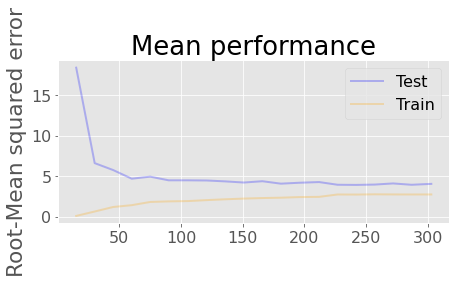

In [212]:
f_learn, ax = plt.subplots(figsize=(7,3))
ax.plot(train_sizes,np.sqrt(-test_scores.mean(1)), alpha=0.25, linewidth=2, label ='Test', color='blue') # negated, because we already use neg_MSE
ax.plot(train_sizes,np.sqrt(-train_scores.mean(1)), alpha=0.25, linewidth=2, label='Train', color='orange') # negated, because we already use neg_MSE

ax.set_title('Mean performance')
ax.set_ylabel('Root-Mean squared error')
ax.legend();

## Learning Curves (IV/IV)

We can also plot the range of performances on different folds!

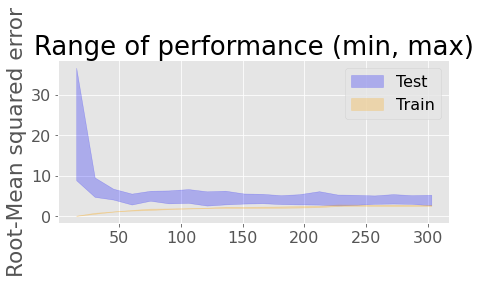

In [209]:
f_learn, ax = plt.subplots(figsize=(7,3))
ax.fill_between(train_sizes, np.sqrt(-test_scores.min(1)), np.sqrt(-test_scores.max(1)), alpha=0.25, label ='Test', color='blue')

ax.fill_between(train_sizes, np.sqrt(-train_scores.min(1)), np.sqrt(-train_scores.max(1)),  alpha=0.25, label='Train', color='orange')

ax.set_title('Range of performance (min, max)')
ax.set_ylabel('Root-Mean squared error')
ax.legend();

# Video 12.5: Tools for Model Selection - Validation Curves

## Validation Curves (I/II)
*Can we plot the optimal hyperparameters?*

In [224]:
# LOAD FROM SCIKIT-LEARN
from sklearn.model_selection import validation_curve

# FIT AND EVALUATE FOR DIFFERENT LAMBDAS
train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_dev,
                     y=y_dev,
                     param_name='lasso__alpha', #built-in name of hyperparameter
                     param_range=lambdas, #values to consider
                     scoring='neg_mean_squared_error',                 
                     cv=10)

# OBTAIN MSE FOR DIFFERENT LAMBDAS AND PRINT BEST
mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Validation.nsmallest(1))


lambda
0.01642    16.315386
Name: Validation, dtype: float64


## Validation Curves (II/II)

As always, we are interested in the lambda that minimizes the MSE on the *validation data*:

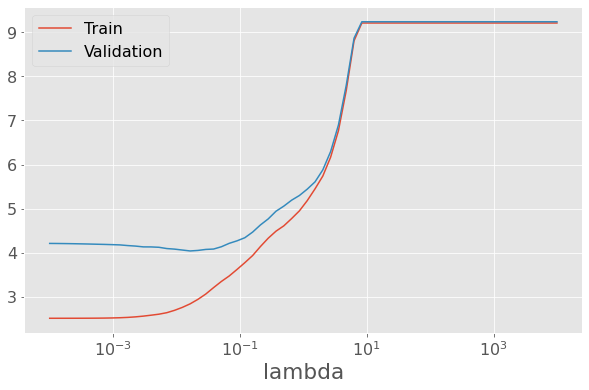

In [221]:
np.sqrt(mse_score).plot(logx=True, figsize=(10,6));

# Video 12.6: Tools for Model Selection - Grid Search

## Grid Search (I/IV)
*How do we search for two or more optimal parameters (e.g. elastic net)?*

More formally:
- Goal: find the optimal parameter combination: $$\lambda_1^*,\lambda_2^*=\arg\min_{\lambda_1,\lambda_2}MSE^{CV}(X_{train},y_{train})$$

- Option 1: We can loop over the joint grid of parameters.
  - One level for each parameter.
  - Caveats: Manual, tedious (slow and a lot of code)...

- Option 2: *sklearn* has `GridSearchCV` has a tool which tests all parameter combinations.

## Grid Search (II/IV)
*How does this look in Python?*

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

pipe_el = make_pipeline(PolynomialFeatures(include_bias=False), 
                        StandardScaler(),
                        ElasticNet())

gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':lambdas,
                              'elasticnet__l1_ratio':np.linspace(0,1,20)}, 
                  scoring='neg_mean_squared_error', 
                  cv=10)

models['ElasicNetCV'] = gs.fit(X_dev, y_dev)

- Notation: double underscore between estimator and hyperparameter, e.g. 'est__hyperparam' 
- Scoring: As alwasy, negative MSE as we're maximizing the score ~ minimize MSE.

## Grid Search (III/IV)
*What does the grid search yield?*

In [180]:
for name, model in models.items():
    score = mse(model.predict(X_test),y_test)
    print(name, round(score, 2))
print()
print('CV params:', gs.best_params_)

Lasso 11.03
Lasso CV 11.01
LinReg 20.77
ElasicNetCV 11.1

CV params: {'elasticnet__alpha': 0.009316027658125524, 'elasticnet__l1_ratio': 0.0}


## Grid Search (IV/IV)
*What if we have 10,000 parameter combinations?*

- Option 1: you buy a cluster on Amazon, learn how to parallelize across computers. 

- Option 2: you drop some of the parameter values

- Option 3: `RandomizedSearchCV` searches a subset of the combinations.

## Miscellanous
*How do we get the coefficient from the models?*

In [123]:
gs.best_params_ # extract hyperparameters

{'elasticnet__alpha': 0.009316027658125524, 'elasticnet__l1_ratio': 0.0}

In [183]:
gs.best_estimator_.steps[2][1].coef_ # extract coeffiecients from model

array([ 4.85339218e-01, -6.94306409e-01,  2.39086815e+00,  1.25681006e+00,
        1.94480857e+00,  2.52481730e+00,  2.54490067e+00, -3.06291060e+00,
        3.79617392e+00,  2.27482135e+00,  4.12269814e-01,  1.11267505e-01,
        7.07924587e-01,  1.05272439e+00,  3.99319052e-01,  5.29495375e-01,
        2.74928238e+00, -8.76873200e-01, -1.05986825e+00,  1.79178628e-01,
       -9.36716376e-01, -3.01694019e-01, -1.61786040e-01, -1.44038859e-01,
       -5.25603640e-01,  3.64818030e-01, -9.74189334e-02, -5.36103665e-01,
       -1.10110992e-01, -2.30120822e-03,  1.79085541e+00, -2.93096129e-01,
       -6.94303332e-01, -2.44515127e-01,  7.77819960e-01,  7.21700074e-01,
        2.22295792e-01, -1.19013491e+00,  8.76178255e-01,  5.56521368e-01,
        1.24536204e+00, -2.02536448e+00,  4.76945544e-01, -6.79761381e-01,
        9.87337713e-01,  4.86825767e-01, -7.23251726e-01,  1.83265786e-01,
       -2.35919013e+00,  1.12469340e+00, -2.54596298e+00, -2.86465488e+00,
        1.22649582e+00,  